In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

from scipy.stats import norm
#%matplotlib notebook

In [2]:
from scipy.optimize import fsolve

In [50]:
def center_of_mass(a,b):
    """Функция для нахождения координат центра масс.
 
    """
        
    return ((a-1)*0.5, (b-1)*0.5) 

def square_radius_of_gyration(conformation):
    """Функция возвращает радиус вращения для данной конформации """
    cent_mass=center_of_mass(conformation[0], conformation[1])
    summa=0
    A = 0
    BC = 0
    D = 0
    #print(cent_mass)
    for i in range(conformation[0]):
        for j in range(conformation[1]):
            dist = (i-cent_mass[0],  j-cent_mass[1])
            #print(dist)
            summa=summa+dist[0]*dist[0]+dist[1]*dist[1]
            A+=dist[0]*dist[0]
            D+=dist[1]*dist[1]
            BC+=dist[0]*dist[1]
        
    A/=len(conformation)
    D/=len(conformation)
    BC/=len(conformation)
    equ = lambda x: x*x-(A+D)*x+(A*D-BC*BC)
    
    #lambda1 = fsolve(equ, 10)[0]
    #lambda2 = fsolve(equ, 0)[0]
    
    Di = (A+D)*(A+D)-4*(A*D - BC*BC)
    
    lambda1 = ((A+D) + np.sqrt(Di))*0.5
    lambda2 = ((A+D) - np.sqrt(Di))*0.5;
    
    aratio = (lambda1-lambda2)**2/(lambda1+lambda2)**2
    #print(A, D, BC)
    #print(A+D, summa/len(conformation)  )
    #print(lambda1, lambda2, aratio)
    
    return summa/len(conformation),lambda1,lambda2,aratio

In [51]:
sides = np.array([[200,200], [150,200], [100, 200], [80,200], [50,200], [40,200],[20,200], [1,200] ])

In [52]:
ratios = []

aspherical_results = []


for pairs in sides:
    
    r,lambda1,lambda2,aratio = square_radius_of_gyration(pairs)
    
    ratios.append(pairs[0]/pairs[1])
    
    aspherical_results.append(aratio)

In [53]:
ratios

[1.0, 0.75, 0.5, 0.4, 0.25, 0.2, 0.1, 0.005]

In [54]:
aspherical_results

[0.0,
 0.07840501784085507,
 0.36002880172809215,
 0.5244209508912389,
 0.7786199929601789,
 0.8521529417303602,
 0.9608832926285141,
 1.0]

No handles with labels found to put in legend.


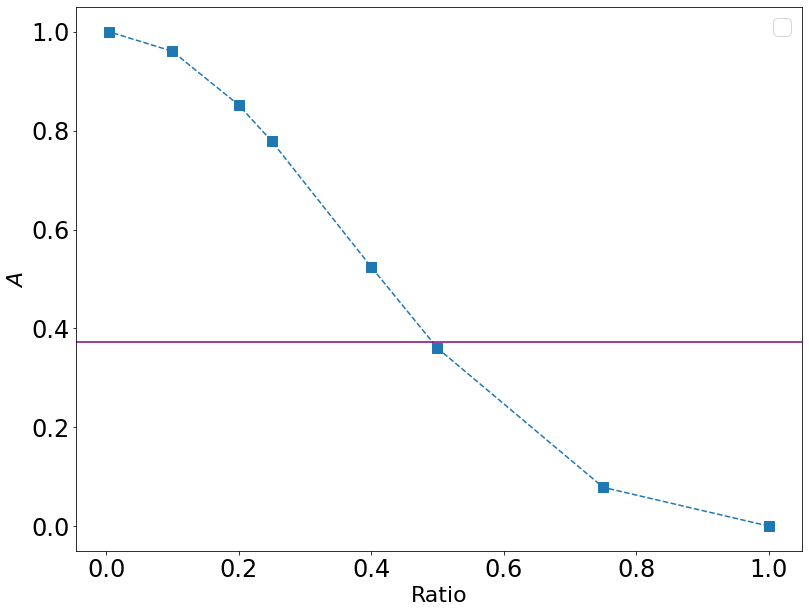

In [57]:
 
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
 
plt.plot(ratios, aspherical_results, "s--", ms = 10 )
  
plt.xlabel(r'Ratio', fontsize = 22)
plt.ylabel(r"$ A $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 

#plt.xlim(0.83, 0.835)
#plt.ylim(0.1, 4.5)
 
plt.axhline(0.3726, c ="purple") 

plt.legend(fontsize=22)

#plt.grid()